<a href="https://colab.research.google.com/github/orkhan-amrullayev/Image_Clustering_Flowers/blob/main/Clustering_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [5]:
path = r"/content/flowers"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [6]:
print(sorted(flowers[:10]))

['0006.png', '0007.png', '0011.png', '0027.png', '0073.png', '0082.png', '0121.png', '0163.png', '0194.png', '0200.png']


In [7]:
# load the image as a 224x224 array
img = load_img(flowers[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [8]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
(1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [9]:
x = preprocess_input(reshaped_img)

In [10]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467904/553467096 [==============================] - 4s 0us/step


In [11]:
features = model.predict(x)
print(features.shape)
(1,4096)

(1, 4096)


(1, 4096)

In [12]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [13]:
data = {}
p = r"/content"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)

# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

unique_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [15]:
print(f"Components before PCA: {feat.shape[1]}")

Components before PCA: 4096


In [16]:
print(f"Components after PCA: {pca.n_components}")
unique_labels

Components after PCA: 100


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
#kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
kmeans = KMeans(n_clusters=10,n_jobs=-1, random_state=22)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([2, 5, 3, 8, 3, 5, 6, 7, 9, 2, 3, 3, 1, 7, 1, 9, 1, 7, 1, 1, 1, 9,
       3, 6, 1, 6, 3, 8, 3, 6, 6, 1, 8, 6, 1, 6, 6, 1, 6, 5, 3, 5, 7, 6,
       7, 3, 7, 5, 8, 6, 8, 6, 5, 3, 1, 1, 7, 1, 1, 6, 6, 3, 9, 8, 6, 8,
       7, 8, 2, 1, 2, 6, 5, 6, 1, 9, 6, 3, 9, 2, 4, 6, 2, 1, 1, 9, 5, 2,
       9, 2, 7, 1, 6, 6, 2, 3, 1, 1, 2, 3, 9, 9, 5, 3, 9, 2, 4, 1, 4, 9,
       7, 6, 2, 2, 6, 2, 7, 1, 3, 6, 9, 1, 0, 7, 7, 6, 8, 1, 3, 1, 9, 1,
       2, 1, 7, 8, 1, 2, 9, 1, 1, 2, 7, 3, 7, 4, 8, 5, 8, 7, 8, 6, 7, 8,
       6, 4, 1, 1, 4, 7, 8, 2, 6, 9, 1, 2, 1, 5, 1, 2, 3, 6, 1, 8, 4, 7,
       8, 1, 4, 8, 5, 1, 5, 1, 3, 1, 6, 3, 6, 6, 4, 9, 9, 7, 6, 9, 6, 9,
       9, 3, 1, 9, 3, 3, 7, 1, 1, 3, 6, 3], dtype=int32)

In [31]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [32]:
groups[0]

['0187.png']

In [38]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

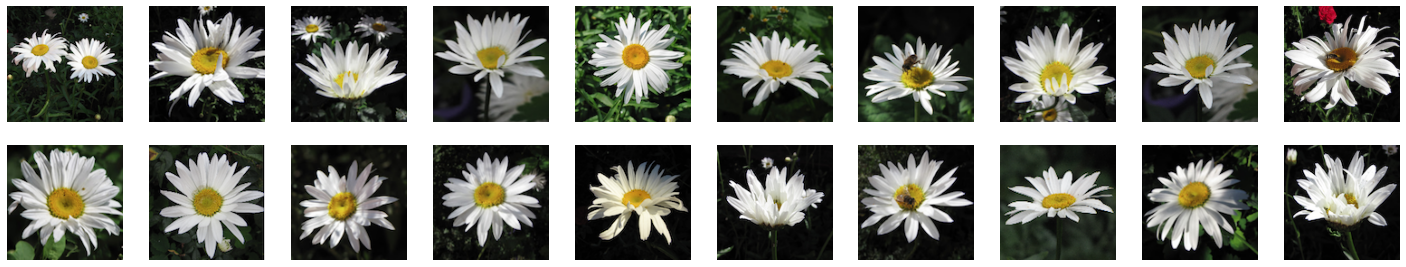

In [40]:
view_cluster(2)

In [23]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

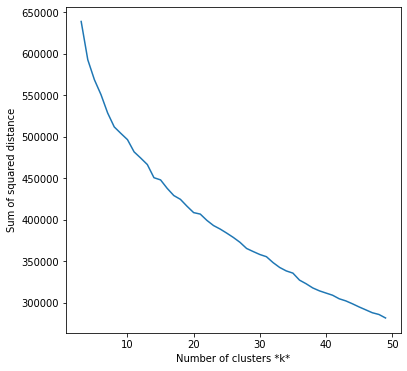

In [24]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
groups

{0: ['0140.png',
  '0178.png',
  '0135.png',
  '0208.png',
  '0088.png',
  '0046.png',
  '0205.png',
  '0112.png',
  '0082.png',
  '0022.png',
  '0191.png',
  '0090.png',
  '0148.png',
  '0134.png',
  '0123.png',
  '0152.png',
  '0103.png',
  '0200.png',
  '0052.png',
  '0070.png',
  '0142.png'],
 1: ['0131.png',
  '0071.png',
  '0182.png',
  '0154.png',
  '0086.png',
  '0170.png',
  '0034.png',
  '0121.png',
  '0025.png',
  '0093.png',
  '0194.png',
  '0057.png',
  '0198.png',
  '0028.png',
  '0176.png',
  '0104.png',
  '0115.png',
  '0124.png',
  '0066.png',
  '0075.png'],
 2: ['0021.png',
  '0003.png',
  '0027.png',
  '0113.png',
  '0061.png',
  '0190.png',
  '0151.png',
  '0132.png',
  '0094.png',
  '0180.png',
  '0179.png',
  '0087.png',
  '0164.png',
  '0127.png',
  '0102.png',
  '0139.png',
  '0106.png',
  '0015.png',
  '0145.png',
  '0039.png',
  '0146.png',
  '0024.png',
  '0122.png'],
 3: ['0054.png',
  '0105.png',
  '0204.png',
  '0084.png',
  '0155.png',
  '0169.png',
  '00

In [ ]:

keys_values = groups.items()

new_gr = {str(key): str(value) for key, value in keys_values}

In [ ]:
for key, value in groups.items:
  value + key

TypeError: ignored

In [ ]:
#Thanks to https://github.com/Gabe-flomo
#here is the link of kaggle competetion:
#https://www.kaggle.com/nageshsingh/flower-classification-xception